In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [288]:
data = pd.read_csv(r"C:\Users\HP\Documents\data mining\breast-cancer.csv")

In [289]:
#menampilkan 5 baris pertama dari dataset
data_head = data.head()
data_head

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [290]:
#memberikan statistik deskriptif dari dataset
data_statistics = data.describe()
data_statistics

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [291]:
# Menunjukkan jumlah baris dan kolom dalam dataset
data_shape = data.shape

# Menghitung jumlah kasus untuk setiap jenis diagnosis 
#nilai B (Benign) dan M (Malignant) di kolom "diagnosis"
diagnosis_counts = data['diagnosis'].value_counts()

data_shape, diagnosis_counts


((569, 32),
 diagnosis
 B    357
 M    212
 Name: count, dtype: int64)

In [292]:
#encoding label
# labelencoder untuk mengubah label diagnosis dari kategorial (B dan M) menjadi numerik (0 dan 1 )


labelencoder_Y = LabelEncoder()
data['diagnosis'] = labelencoder_Y.fit_transform(data['diagnosis'].values)

# To check if the labels have been converted:
print(data['diagnosis'].head())


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

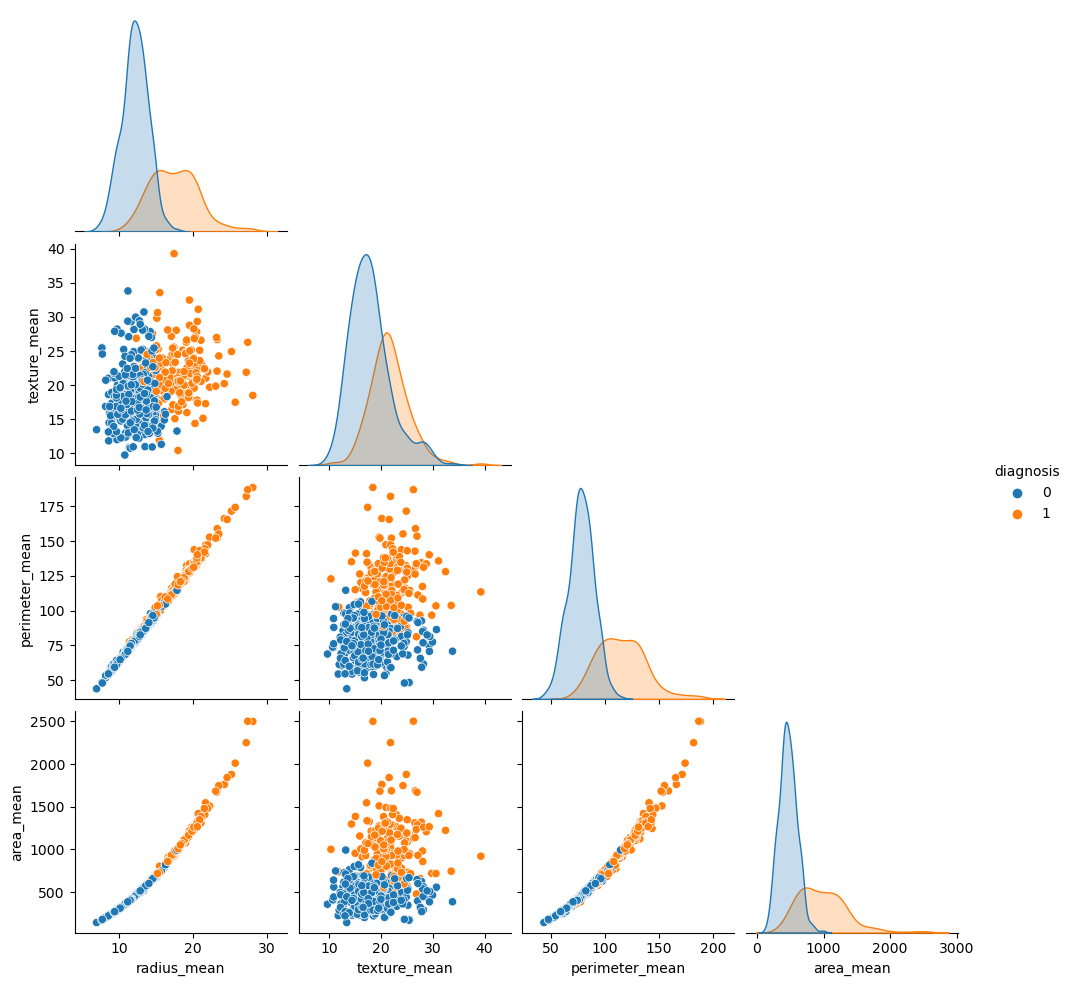

In [293]:
# Membuat pairplot untuk visualisasi hubungan antara beberapa fitur utama
#hue='diagnosis' (membedakan warna berdasarkan diagnosis)
#vars=['.....'] (menentukan variable yang akan di visualisasi)
#corner=True (menampilkan hanya setengah dari plot unruk efisiensi) |||||

sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], corner=True)
plt.show()

In [294]:
# Menghitung matriks korelasi antara semua fitur 
correlation_matrix = data.corr()

# Menampilkan korelasi yang kuat (> 0.7 atau < -0.7)
strong_correlations = correlation_matrix[((correlation_matrix > 0.7) | (correlation_matrix < -0.7)) & (correlation_matrix != 1.0)]
print("Korelasi Kuat:")
print(strong_correlations.unstack().dropna().sort_values(ascending=False))

# Menampilkan korelasi yang lemah (-0.3 < x < 0.3)
weak_correlations = correlation_matrix[((correlation_matrix > -0.3) & (correlation_matrix < 0.3)) & (correlation_matrix != 1.0)]
print("\nKorelasi Lemah:")
print(weak_correlations.unstack().dropna().sort_values(ascending=False))

# Menampilkan korelasi negatif (< 0)
negative_correlations = correlation_matrix[correlation_matrix < 0]
print("\nKorelasi Negatif:")
print(negative_correlations.unstack().dropna().sort_values(ascending=False))

Korelasi Kuat:
perimeter_mean       radius_mean            0.997855
radius_mean          perimeter_mean         0.997855
perimeter_worst      radius_worst           0.993708
radius_worst         perimeter_worst        0.993708
area_mean            radius_mean            0.987357
                                              ...   
radius_worst         radius_se              0.715065
concave points_mean  perimeter_se           0.710650
perimeter_se         concave points_mean    0.710650
area_mean            diagnosis              0.708984
diagnosis            area_mean              0.708984
Length: 156, dtype: float64

Korelasi Lemah:
concavity_mean          texture_worst             0.299879
texture_worst           concavity_mean            0.299879
                        radius_mean               0.297008
radius_mean             texture_worst             0.297008
smoothness_mean         perimeter_se              0.296092
                                                    ...   
fra

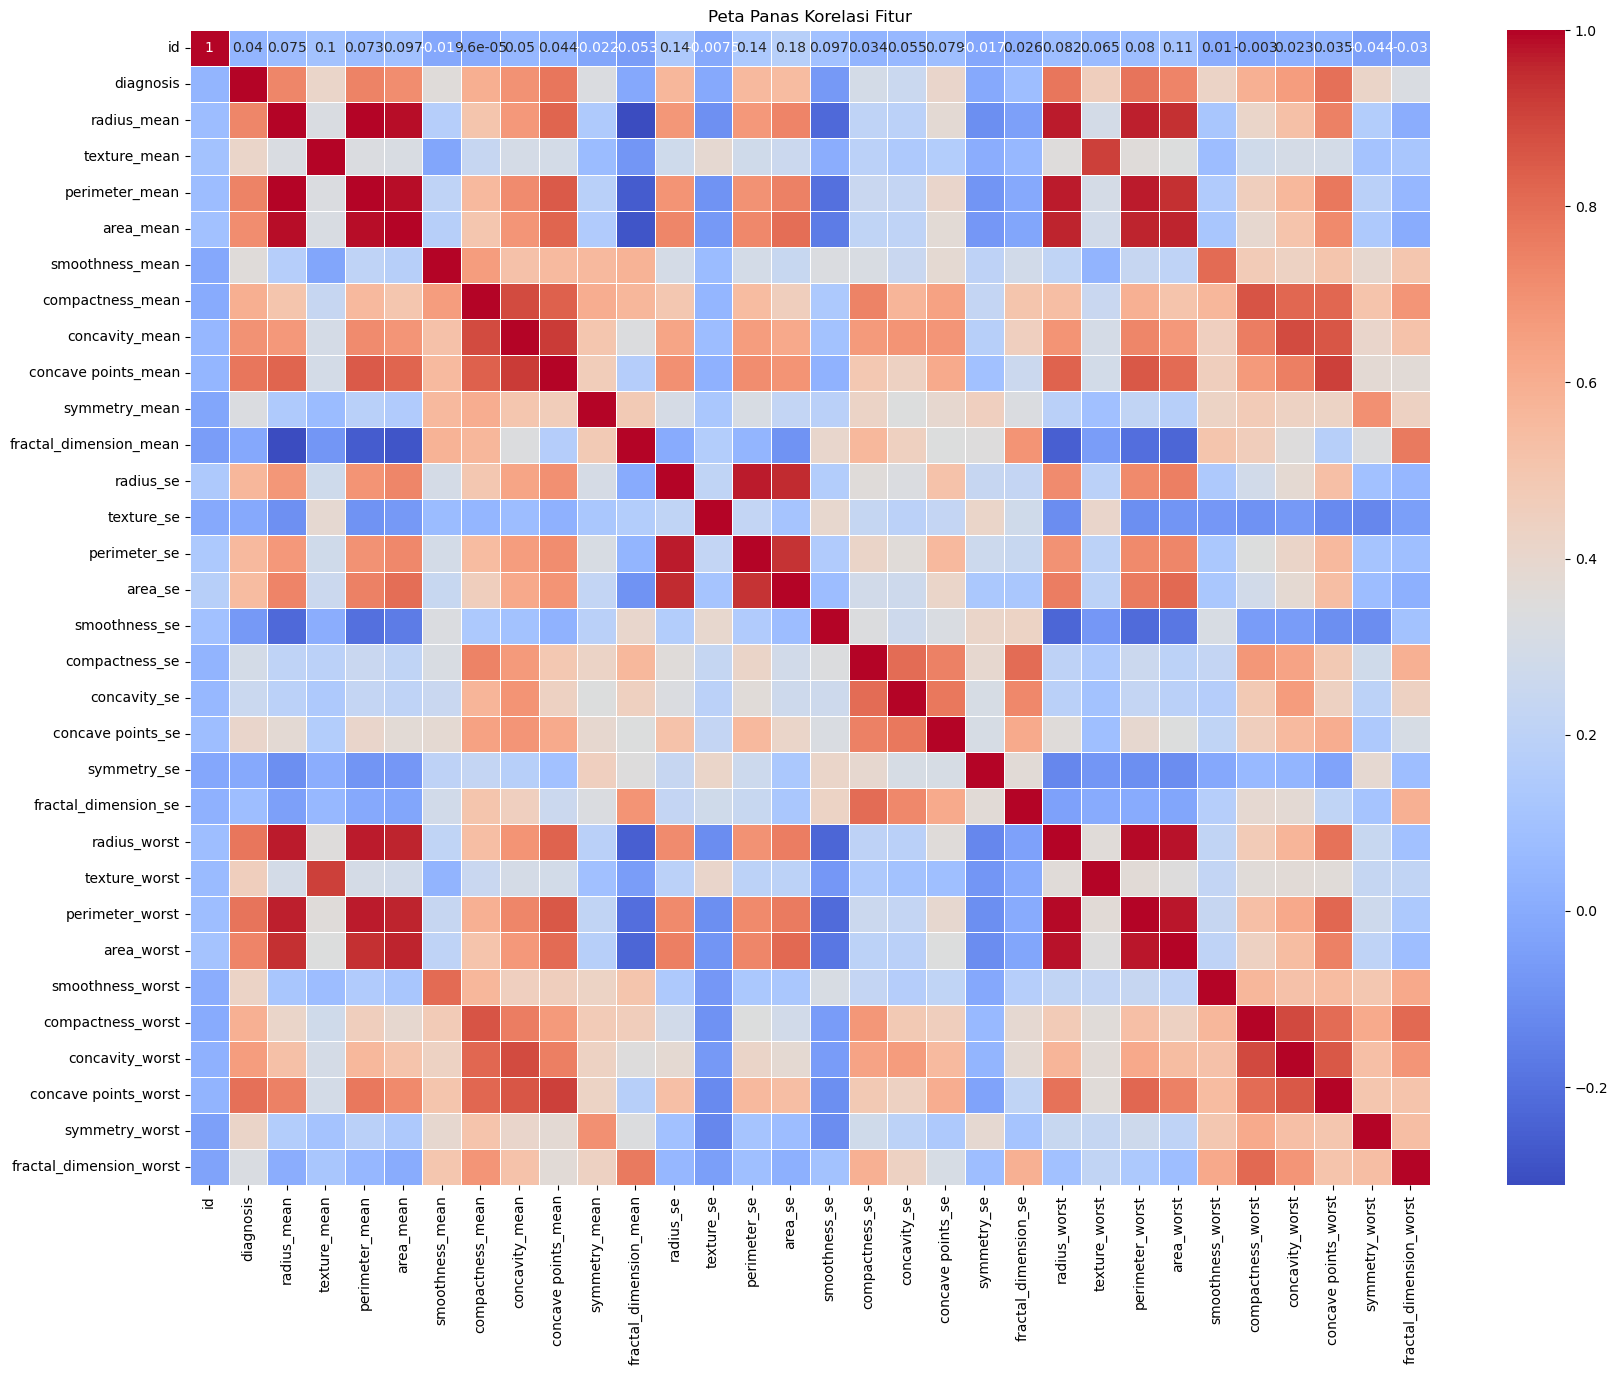

In [295]:
# Membuat peta panas (heatmap)
#annot=True (menampilkan nilai korelasi disetiap sel)
#cmap='...' (menggunakan skema warna dari biru(negatif) ke merah (positif) )

plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Peta Panas Korelasi Fitur")
plt.show()

hasil analisis : 

1. eksplorasi data awal :
   - dataset memiliki 30 fitur dan 1 kolom target (diagnosis)
   - terdapat 2 kelas diagnosis, yaitu Benign (B) dan Maligant (M)
2. encoding label :
   -label diagnosis diubah menjadi numerik (0 = Benign dan 1 = Maligant) untuk memudahkan analisis
3. pairplot :
   - memungkinkan visualisasi distribusi setiap fitur dan hubungannya dengan fitur lain
   - dapat membantu mengidentifikasi pola / cluster yang mungkin ada antara kasus Benign dan  Maligant
4. matriks korelasi :
   - mengidentifikasi fitur - fitur yang memiliki korelasi kuat, lemah atau negatif
   - korelasi kuat = menunjukkan redundansi dalam fitur
   - korelasi lemah = menunjukkan fitur yang kurang informatif
5. heatmap :
   - memberikan gambaran visual yang komprehensif  tentang korelasi antar semua fitur
   - membantu dalam identifikasi cepat kelompok fitur yang sangat berkorelasi 

In [297]:
#penangan data hilang = kode tidak memeriksa / menangani data  yg hilang ||baru

print("Jumlah data hilang per kolom:")
print(data.isnull().sum())

Jumlah data hilang per kolom:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [298]:
#normalisasi data = fitur - fitur mungkin memiliki skala yg berbeda ||baru

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('diagnosis', axis=1))


In [299]:
#analisis fitur penting = untuk mengidentifikasi fitur yg paling penting ||baru

selector = SelectKBest(f_classif, k=10)
selector.fit(data.drop('diagnosis', axis=1), data['diagnosis'])
top_features = data.drop('diagnosis', axis=1).columns[selector.get_support()].tolist()
print("Top 10 features:", top_features)


Top 10 features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


<Figure size 1500x1000 with 0 Axes>

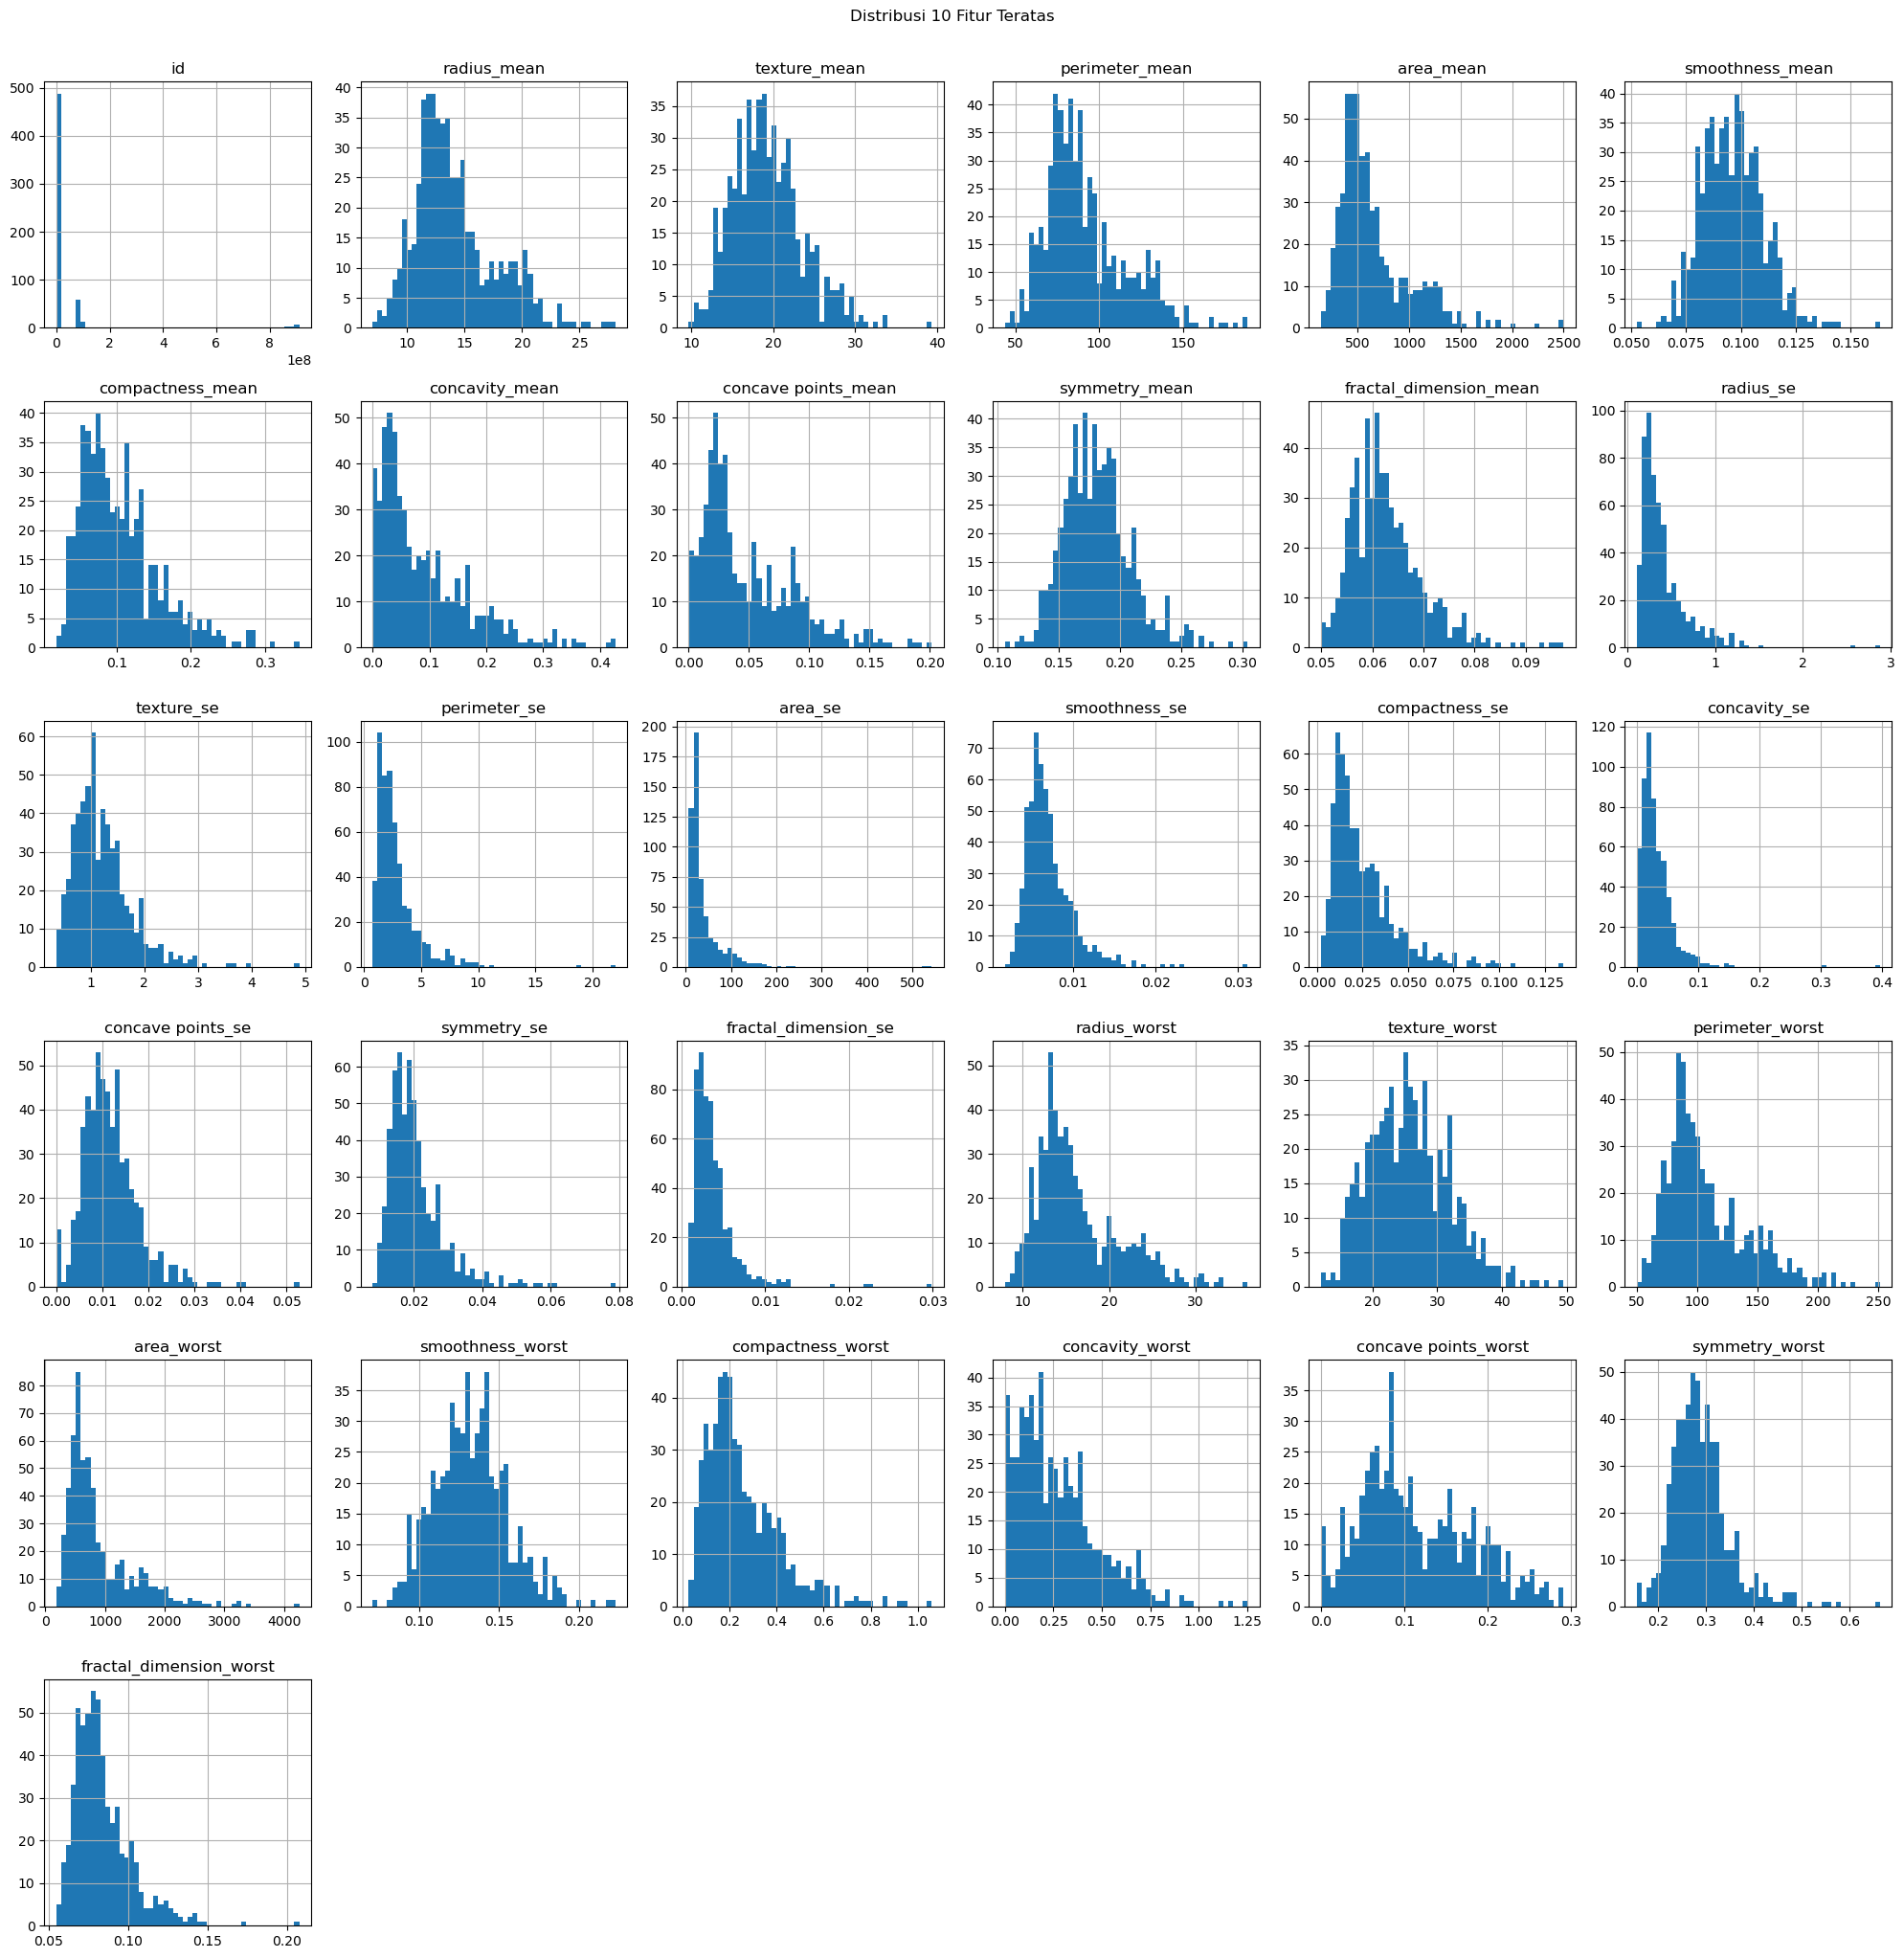

In [300]:
#visualisasi distribusi = histogram / boxplot untuk melihat distribusi fitur ||baru

plt.figure(figsize=(15,10))
data.drop('diagnosis', axis=1).hist(figsize=(20,20), bins=50)
plt.tight_layout()
plt.suptitle("Distribusi 10 Fitur Teratas", y=1.02)
plt.show()


In [301]:
#uji statistik = melakukan uji statistik untuk membandingkan fitur antar kasus Benign dan Malignant 
#baru

print("\nHasil uji t-test untuk fitur-fitur penting:")
for column in data.drop('diagnosis', axis=1).columns:
   t_stat, p_val = stats.ttest_ind(data[data['diagnosis']==0][column], data[data['diagnosis']==1][column])
   print(f"{column}: t-statistic = {t_stat}, p-value = {p_val}")


Hasil uji t-test untuk fitur-fitur penting:
id: t-statistic = -0.9477079911526193, p-value = 0.34368185775951265
radius_mean: t-statistic = -25.435821610057054, p-value = 8.465940572262422e-96
texture_mean: t-statistic = -10.86720108146434, p-value = 4.0586360478980736e-25
perimeter_mean: t-statistic = -26.405212979192665, p-value = 8.43625103617473e-101
area_mean: t-statistic = -23.938687235690992, p-value = 4.734564310307344e-88
smoothness_mean: t-statistic = -9.146098808149038, p-value = 1.0518503592032013e-18
compactness_mean: t-statistic = -17.69839197688993, p-value = 3.9382631058873895e-56
concavity_mean: t-statistic = -23.103963430622642, p-value = 9.966555755072963e-84
concave points_mean: t-statistic = -29.354318592113618, p-value = 7.101150161057422e-116
symmetry_mean: t-statistic = -8.338311789592808, p-value = 5.733384028466827e-16
fractal_dimension_mean: t-statistic = 0.30571112978583087, p-value = 0.7599368037256238
radius_se: t-statistic = -16.39635102598575, p-value =

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

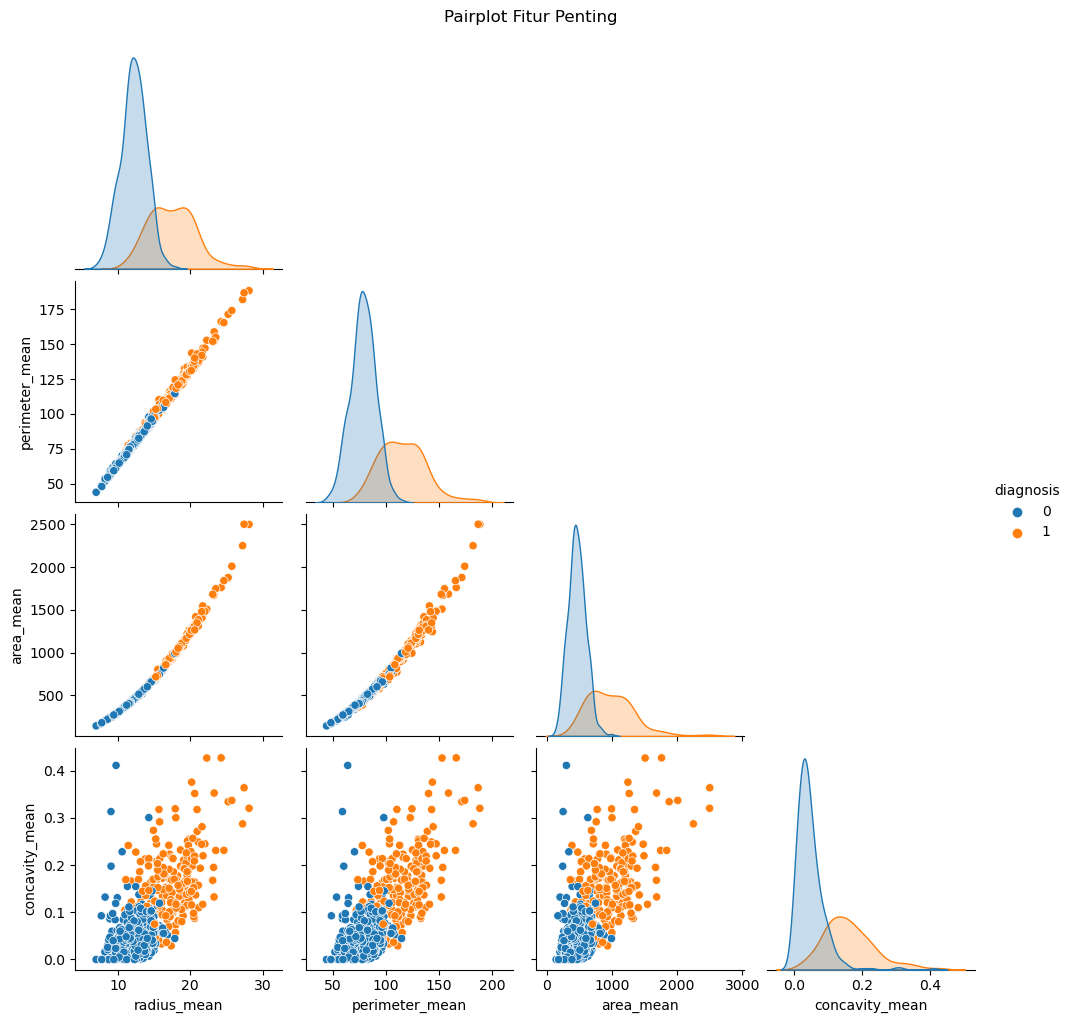

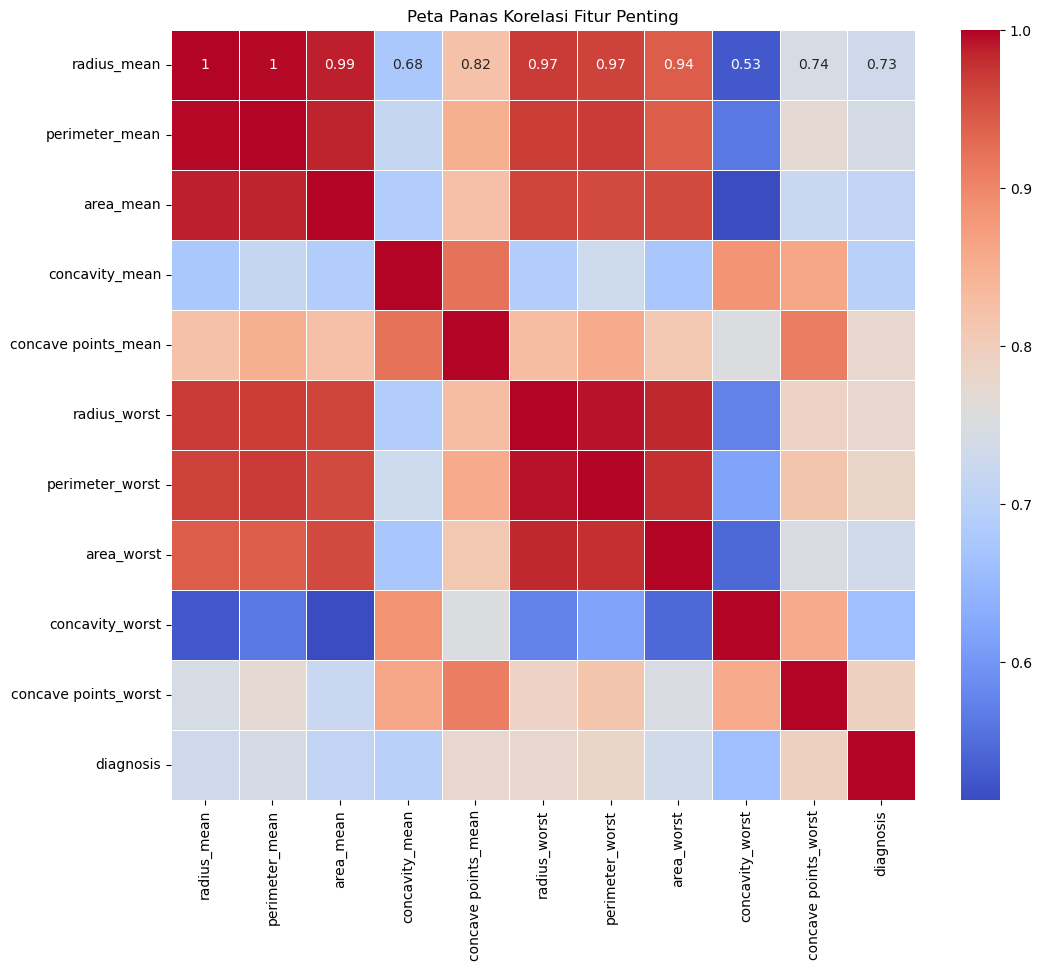

In [302]:
# Update pairplot dengan fitur-fitur penting ||baru
sns.pairplot(data, hue='diagnosis', vars=top_features[:4], corner=True)
plt.suptitle("Pairplot Fitur Penting", y=1.02)
plt.show()

# Update heatmap korelasi dengan fitur-fitur penting ||baru
correlation_matrix_important = data[top_features + ['diagnosis']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_important, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Peta Panas Korelasi Fitur Penting")
plt.show()